# Primary School June 2023 Results
#### English Total: 267, ixiXhosa Total (June): 243, ixiXhosa Total (June): 272

In [210]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
G3_colour = "#6DA9E4"
G2_colour = "#F7D060"
G1_colour = "#917FB3"
GR_colour = "#98D8AA"
ECD_colour = "#FF6D60"

In [211]:
children_all = pd.read_csv("20230623 - Children Results.csv")
children = children_all[children_all['Jan - Listen First Sound'].notna() & children['June - Listen First Sound'].notna()].copy()

children = children[children['City'] == 'Gqeberha'].copy()
children = children[children['Schools'] != 'St Augustines'].copy()

children['Jan - Total'] = children[['Jan - Listen First Sound', 'Jan - Listen Word','Jan - Phonics', 'Jan - Blends', 'Jan - Sight Words',
                                  'Jan - Read Sentences', 'Jan - Read Story', 'Jan - Story Comprehension',
                                  'Jan - Written Letters', 'Jan - Write Name', 'Jan - Write CVCs',
                                  'Jan - Write Sentences']].sum(axis=1,min_count=1)
children['June - Total'] = children[['June - Listen First Sound',
       'June - Listen Word','June - Phonics', 'June - Blends', 'June - Sight Words',
                                  'June - Read Sentences', 'June - Read Story', 'June - Story Comprehension',
                                  'June - Written Letters', 'June - Write Name', 'June - Write CVCs',
                                  'June - Write Sentences']].sum(axis=1,min_count=1)
children['June - Listen First Sound Improvement'] = children['June - Listen First Sound'] - children['Jan - Listen First Sound']
children['June - Listen Word Improvement'] = children['June - Listen Word'] - children['Jan - Listen Word']
children['June - Phonics Improvement'] = children['June - Phonics'] - children['Jan - Phonics']
children['June - Written Letters Improvement'] = children['June - Written Letters'] - children['Jan - Written Letters']
children["Jan - Sounds Total"] =  children["Jan - Listen First Sound"] + children["Jan - Listen Word"]
children["June - Sounds Total"] =  children["June - Listen First Sound"] + children["June - Listen Word"]
children["June - Sounds Total Improvement"] = children["June - Sounds Total"] - children["Jan - Sounds Total"]
children["June - Blends Improvement"] = children["June - Blends"] - children["Jan - Blends"]
children["June - Read Sentences Improvement"] = children["June - Read Sentences"] - children["Jan - Read Sentences"]
children["June - Read Story Improvement"] = children["June - Read Story"] - children["Jan - Read Story"]
children["June - Sight Words Improvement"] = children["June - Sight Words"] - children["Jan - Sight Words"]
children["June - Write Sentence Improvement"] = children["June - Write Sentences"] - children["Jan - Write Sentences"]
children["June - Write CVCs Improvement"] = children["June - Write CVCs"] - children["Jan - Write CVCs"]
children["June - Total Improvement"] = children["June - Total"] - children["Jan - Total"]
# Sounds and Phonics Total is 49
children["Jan - Sounds and Phonics"] = children["Jan - Listen First Sound"] + children["Jan - Listen Word"] + children['Jan - Phonics']
# Reading total is 128
children["Jan - Reading"] = children["Jan - Blends"] + children["Jan - Sight Words"] + children['Jan - Read Sentences'] + children["Jan - Read Story"] + children["Jan - Story Comprehension"]
# Writing total is 87
children["Jan - Writing"] = children['Jan - Written Letters'] + children["Jan - Write CVCs"] + children["Jan - Write Sentences"]
# Sounds and Phonics Total is 49
children["June - Sounds and Phonics"] = children["June - Listen First Sound"] + children["June - Listen Word"] + children['June - Phonics']
# Reading total is 128
children["June - Reading"] = children["June - Blends"] + children["June - Sight Words"] + children['June - Read Sentences'] + children["June - Read Story"] + children["June - Story Comprehension"]
# Writing total is 87
children["June - Writing"] = children['June - Written Letters'] + children["June - Write CVCs"] + children["June - Write Sentences"]

children["June - Sounds and Phonics Improvement"] = children["June - Sounds and Phonics"] - children["Jan - Sounds and Phonics"]
children["June - Reading Improvement"] = children["June - Reading"] - children["Jan - Reading"]
children["June - Writing Improvement"] = children["June - Writing"] - children["Jan - Writing"] 

improvement_columns = ["June - Listen First Sound Improvement","June - Listen Word Improvement", "June - Phonics Improvement","June - Blends Improvement", "June - Sight Words Improvement", "June - Read Sentences Improvement", "June - Read Story Improvement", "June - Written Letters Improvement", "June - Write CVCs Improvement", "June - Write Sentence Improvement", "June - Total Improvement" ]



In [212]:
primary = children[children['Grade'] != 'PreR']
primary_on = primary[primary['On The Programme'] == 'Yes']
gbo = primary.groupby('Schools')
gbo_on = primary_on.groupby('Schools')

GradeR = children[children['Grade'] == 'Grade R']
GradeR_on = GradeR[GradeR['On The Programme'] == 'Yes']
gboR = GradeR.groupby('Schools')
gboR_on = GradeR_on.groupby('Schools')

Grade1 = children[children['Grade'] == 'Grade 1']
Grade1_on = Grade1[Grade1['On The Programme'] == 'Yes']
gbo1 = Grade1.groupby('Schools')
gbo1_on = Grade1_on.groupby('Schools')

Grade2 = children[children['Grade'] == 'Grade 2']
Grade2_on = Grade2[Grade2['On The Programme'] == 'Yes']
gbo2 = Grade2.groupby('Schools')
gbo2_on = Grade2_on.groupby('Schools')

Grade3 = children[children['Grade'] == 'Grade 3']
Grade3_on = Grade3[Grade3['On The Programme'] == 'Yes']
gbo3 = Grade3.groupby('Schools')
gbo3_on = Grade3_on.groupby('Schools')



# % of Children Assessed

In [213]:
primary_all = children_all[children_all['Grade'] != 'PreR']
primary_on_all = primary_all[primary_all['On The Programme'] == 'Yes']
gbo_all = primary_all.groupby('Schools')
gbo_on_all = primary_on_all.groupby('Schools')

total_children = gbo_on_all['Full Name'].count()
total_children_assessed = gbo_on_all['June - Phonics'].count()

percent_assessed = (total_children_assessed / total_children) * 100


df_assessed = pd.DataFrame({'Number of Children': total_children, 
                          'Number of Children Assessed': total_children_assessed, 
                          'Percentage Assessed': percent_assessed})
df_assessed.sort_values('Percentage Assessed', ascending=False)

,Number of Children,Number of Children Assessed,Percentage Assessed
Schools,,,
Astra,55,55,100.000000
Charles Duna,96,95,98.958333
Isaac Booi,144,142,98.611111
Fumisukoma,143,141,98.601399
Ben Sinuka,48,47,97.916667
Ebongweni,47,46,97.872340
Empumalanga,59,57,96.610169
Seyisi,126,121,96.031746
Aaron Gqadu,44,41,93.181818


In [214]:
df_all = primary.groupby('Schools')['On The Programme'].value_counts()
pd.set_option('display.max_rows', None)
df_all

Schools       On The Programme
Aaron Gqadu   Yes                  41
              No                    2
Astra         Yes                  55
              No                    1
Ben Sinuka    Yes                  47
Charles Duna  Yes                  95
              Unsure                1
Ebongweni     Yes                  46
              No                    1
              Unsure                1
Empumalanga   Yes                  57
Fumisukoma    Yes                 141
              No                    1
Isaac Booi    Yes                 142
Molefe        Yes                  38
Seyisi        Yes                 121
              No                    8
Name: On The Programme, dtype: int64

# Average Number of Sessions per Child

In [215]:
df = gbo['Total Sessions'].mean()
df.sort_values(ascending=False)

Schools
Fumisukoma      18.147887
Seyisi          17.504274
Isaac Booi      16.838028
Aaron Gqadu     16.780488
Ebongweni       13.478261
Ben Sinuka      13.022222
Molefe          11.515152
Charles Duna    10.831579
Empumalanga     10.716981
Astra            7.545455
Name: Total Sessions, dtype: float64

# Whole School Results

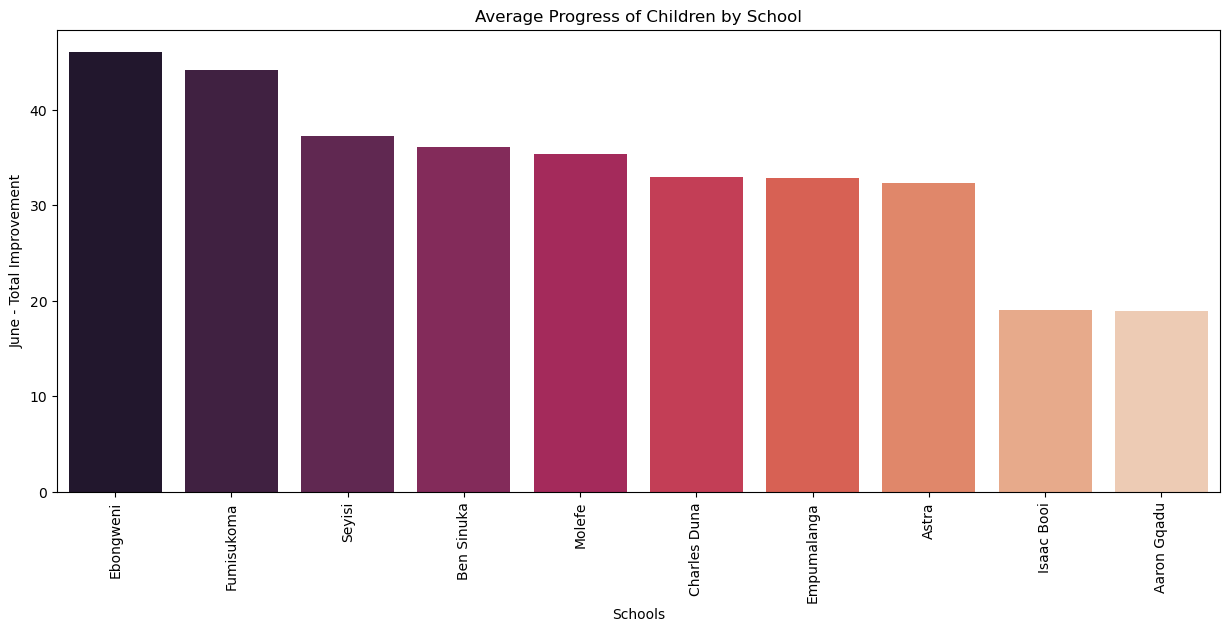

In [216]:
# First, calculate the order of schools based on the mean of 'June - Total Improvement'
order = primary_on.groupby('Schools')['June - Total Improvement'].mean().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(15, 6))

# Then, pass this order to the 'order' parameter in the barplot function
sns.barplot(data=primary_on, x='Schools', y='June - Total Improvement', order=order, errorbar=None, ax=ax, palette="rocket")
plt.title("Average Progress of Children by School")
plt.xticks(rotation=90)
plt.show()

In [217]:
df_improvement = gbo_on[improvement_columns].mean()
df_improvement.sort_values('June - Total Improvement', ascending=False)

,June - Listen First Sound Improvement,June - Listen Word Improvement,June - Phonics Improvement,June - Blends Improvement,June - Sight Words Improvement,June - Read Sentences Improvement,June - Read Story Improvement,June - Written Letters Improvement,June - Write CVCs Improvement,June - Write Sentence Improvement,June - Total Improvement
Schools,,,,,,,,,,,
Ebongweni,5.043478,4.869565,11.478261,1.391304,2.608696,1.478261,1.586957,8.565217,4.347826,3.630435,46.065217
Fumisukoma,2.007092,1.921986,5.312057,1.489362,4.460993,2.049645,12.631206,4.007092,1.865248,7.794326,44.163121
Seyisi,2.380165,3.231405,8.173554,1.677686,3.752066,0.793388,7.041322,4.900826,2.115702,2.578512,37.239669
Ben Sinuka,1.829787,1.468085,4.446809,1.553191,4.744681,3.085106,8.702128,3.148936,1.255319,5.297872,36.148936
Molefe,3.605263,3.500000,7.710526,1.631579,1.973684,1.184211,0.157895,8.236842,4.289474,2.447368,35.368421
Charles Duna,2.684211,1.473684,8.105263,0.600000,1.473684,1.010526,1.757895,6.789474,2.431579,5.936842,32.968421
Empumalanga,1.807018,1.631579,10.508772,1.561404,1.614035,1.333333,3.087719,7.596491,2.929825,0.421053,32.824561
Astra,1.345455,1.890909,4.745455,1.872727,2.672727,1.945455,3.309091,3.981818,2.636364,7.818182,32.381818
Isaac Booi,1.211268,2.070423,3.633803,0.577465,1.225352,0.746479,2.161972,3.373239,1.570423,2.091549,19.028169


# Grade R Results

In [218]:
import plotly.graph_objects as go

# Create a new DataFrame, with means and sorted by 'June - Total'
GradeR_on_grouped = GradeR_on.groupby('Schools')[['Jan - Total', 'June - Total']].mean()
GradeR_on_sorted = GradeR_on_grouped.sort_values('June - Total', ascending=False).reset_index()

# Create bar traces for January and June
trace1 = go.Bar(
    x=GradeR_on_sorted['Schools'], 
    y=GradeR_on_sorted['Jan - Total'],
    name='January Total'
)

trace2 = go.Bar(
    x=GradeR_on_sorted['Schools'], 
    y=GradeR_on_sorted['June - Total'],
    name='June Total'
)

# Combine the traces
data = [trace1, trace2]

# Create a layout with title and axis labels
layout = go.Layout(
    title='Average Total Scores for January and June',
    barmode='group', # bars for the same x location will be placed beside each other
    xaxis=dict(title='Schools'),
    yaxis=dict(title='Average Total Scores')
)

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
fig.show()


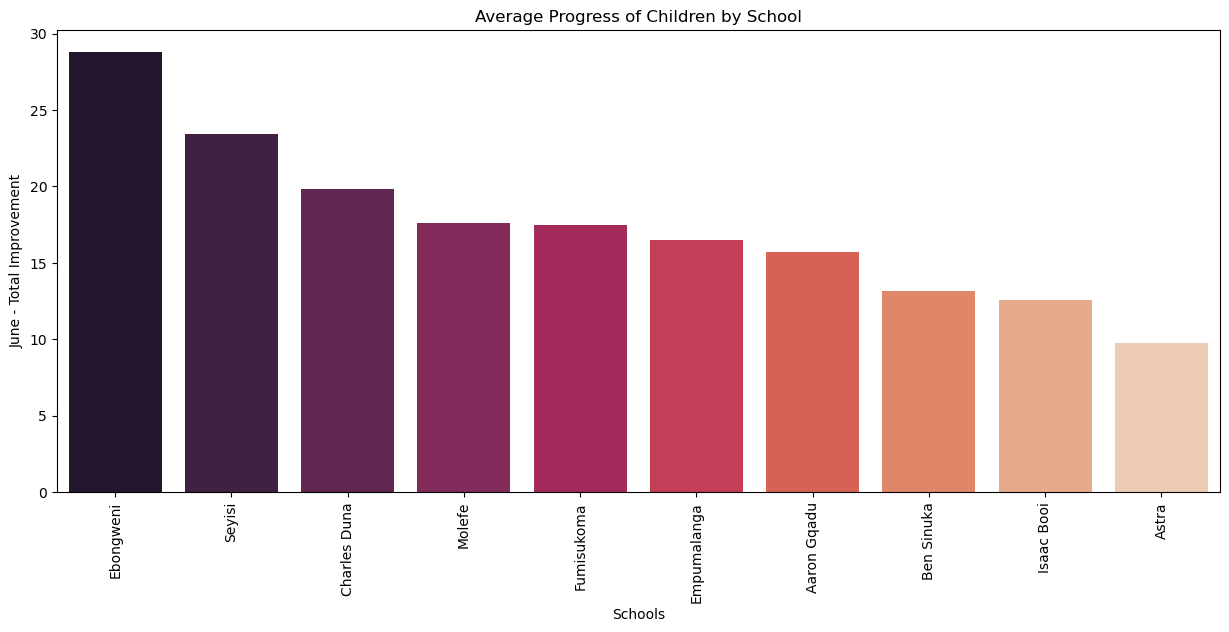

In [219]:
# First, calculate the order of schools based on the mean of 'June - Total Improvement'
order = GradeR_on.groupby('Schools')['June - Total Improvement'].mean().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(15, 6))

# Then, pass this order to the 'order' parameter in the barplot function
sns.barplot(data=GradeR_on, x='Schools', y='June - Total Improvement', order=order, errorbar=None, ax=ax, palette="rocket")
plt.title("Average Progress of Children by School")
plt.xticks(rotation=90)
plt.show()

In [220]:
df_GradeR_improvement = gboR_on[improvement_columns].mean()
df_GradeR_improvement.sort_values('June - Total Improvement', ascending=False)

,June - Listen First Sound Improvement,June - Listen Word Improvement,June - Phonics Improvement,June - Blends Improvement,June - Sight Words Improvement,June - Read Sentences Improvement,June - Read Story Improvement,June - Written Letters Improvement,June - Write CVCs Improvement,June - Write Sentence Improvement,June - Total Improvement
Schools,,,,,,,,,,,
Ebongweni,6.450000,3.950000,7.550000,0.450000,1.000000,0.400000,0.100000,6.200000,0.850000,0.450000,28.800000
Seyisi,4.920000,3.960000,9.080000,0.120000,0.000000,0.000000,0.000000,3.800000,0.680000,0.000000,23.440000
Charles Duna,2.928571,0.142857,7.250000,0.071429,0.125000,0.089286,0.000000,6.410714,1.214286,0.589286,19.857143
Molefe,4.272727,1.727273,4.272727,0.272727,1.000000,0.000000,0.000000,4.545455,0.818182,0.000000,17.636364
Fumisukoma,5.133333,1.266667,5.200000,0.333333,0.133333,0.133333,0.000000,3.666667,0.333333,0.000000,17.466667
Empumalanga,2.625000,0.937500,8.187500,0.062500,0.062500,0.000000,0.000000,3.875000,0.437500,0.000000,16.500000
Aaron Gqadu,3.333333,0.944444,6.333333,0.055556,0.500000,0.000000,0.000000,3.277778,0.555556,0.277778,15.722222
Ben Sinuka,4.571429,5.000000,1.857143,0.000000,0.000000,0.142857,0.142857,0.142857,0.285714,0.000000,13.142857
Isaac Booi,2.282609,1.586957,3.326087,0.043478,0.086957,-0.021739,0.000000,3.565217,0.673913,0.173913,12.586957


# Grade 1 Summary

In [221]:
import plotly.graph_objects as go

# Create a new DataFrame, with means and sorted by 'June - Total'
Grade1_on_grouped = Grade1_on.groupby('Schools')[['Jan - Total', 'June - Total']].mean()
Grade1_on_sorted = Grade1_on_grouped.sort_values('June - Total', ascending=False).reset_index()

# Create bar traces for January and June
trace1 = go.Bar(
    x=Grade1_on_sorted['Schools'], 
    y=Grade1_on_sorted['Jan - Total'],
    name='January Total'
)

trace2 = go.Bar(
    x=Grade1_on_sorted['Schools'], 
    y=Grade1_on_sorted['June - Total'],
    name='June Total'
)

# Combine the traces
data = [trace1, trace2]

# Create a layout with title and axis labels
layout = go.Layout(
    title='Average Total Scores for January and June',
    barmode='group', # bars for the same x location will be placed beside each other
    xaxis=dict(title='Schools'),
    yaxis=dict(title='Average Total Scores')
)

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
fig.show()

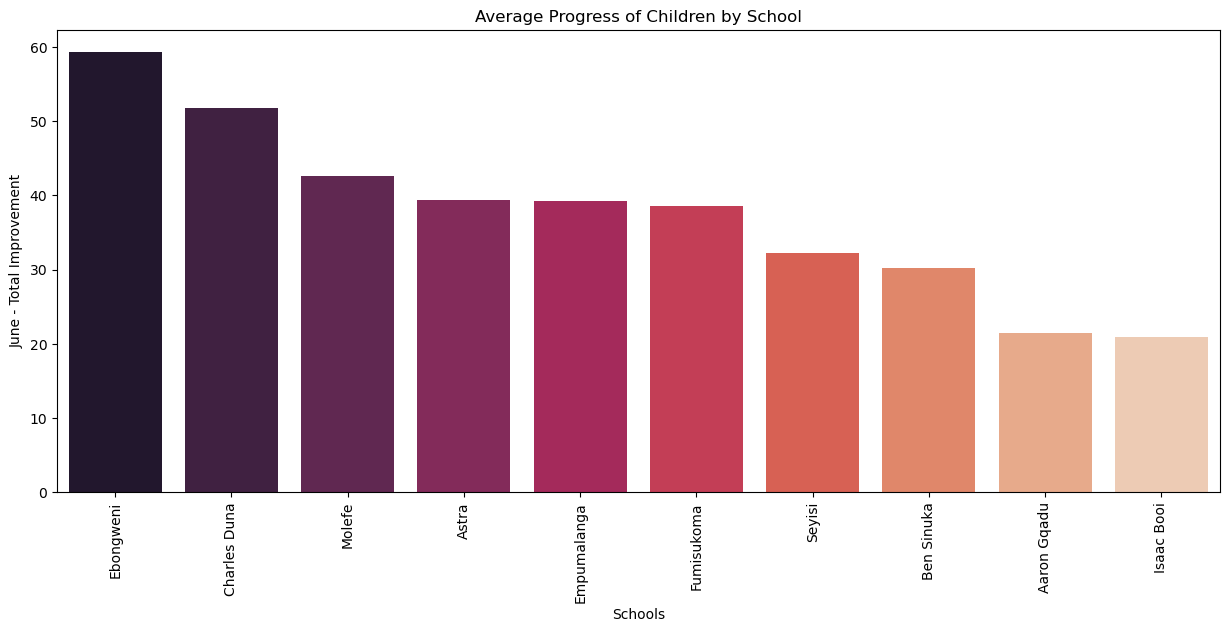

In [222]:
# First, calculate the order of schools based on the mean of 'June - Total Improvement'
order = Grade1_on.groupby('Schools')['June - Total Improvement'].mean().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(15, 6))

# Then, pass this order to the 'order' parameter in the barplot function
sns.barplot(data=Grade1_on, x='Schools', y='June - Total Improvement', order=order, errorbar=None, ax=ax, palette="rocket")
plt.title("Average Progress of Children by School")
plt.xticks(rotation=90)
plt.show()

In [223]:
df_Grade1_improvement = gbo1_on[improvement_columns].mean()
df_Grade1_improvement.sort_values('June - Total Improvement', ascending=False)

,June - Listen First Sound Improvement,June - Listen Word Improvement,June - Phonics Improvement,June - Blends Improvement,June - Sight Words Improvement,June - Read Sentences Improvement,June - Read Story Improvement,June - Written Letters Improvement,June - Write CVCs Improvement,June - Write Sentence Improvement,June - Total Improvement
Schools,,,,,,,,,,,
Ebongweni,3.961538,5.576923,14.500000,2.115385,3.846154,2.307692,2.730769,10.384615,7.038462,6.076923,59.346154
Charles Duna,2.333333,3.384615,9.333333,1.358974,3.410256,2.333333,4.282051,7.333333,4.179487,13.615385,51.794872
Molefe,3.333333,4.222222,9.111111,2.185185,2.370370,1.666667,0.222222,9.740741,5.703704,3.444444,42.592593
Astra,1.095238,2.166667,5.119048,2.452381,3.476190,2.547619,4.333333,4.428571,3.452381,10.238095,39.380952
Empumalanga,1.487805,1.902439,11.414634,2.146341,2.219512,1.853659,4.292683,9.048780,3.902439,0.585366,39.195122
Fumisukoma,2.924528,3.150943,9.452830,1.773585,2.698113,1.943396,2.245283,7.132075,4.490566,2.415094,38.584906
Seyisi,2.319149,4.191489,8.000000,1.446809,3.446809,0.468085,0.042553,6.361702,4.085106,1.510638,32.170213
Ben Sinuka,3.888889,3.666667,9.888889,1.666667,0.666667,0.000000,0.000000,6.777778,2.777778,0.000000,30.222222
Aaron Gqadu,2.130435,2.130435,3.956522,1.130435,1.347826,0.260870,0.086957,5.043478,2.869565,1.695652,21.391304


# Grade 2 Summary

In [224]:
import plotly.graph_objects as go

# Create a new DataFrame, with means and sorted by 'June - Total'
Grade2_on_grouped = Grade2_on.groupby('Schools')[['Jan - Total', 'June - Total']].mean()
Grade2_on_sorted = Grade2_on_grouped.sort_values('June - Total', ascending=False).reset_index()

# Create bar traces for January and June
trace1 = go.Bar(
    x=Grade2_on_sorted['Schools'], 
    y=Grade2_on_sorted['Jan - Total'],
    name='January Total'
)

trace2 = go.Bar(
    x=Grade2_on_sorted['Schools'], 
    y=Grade2_on_sorted['June - Total'],
    name='June Total'
)

# Combine the traces
data = [trace1, trace2]

# Create a layout with title and axis labels
layout = go.Layout(
    title='Average Total Scores for January and June',
    barmode='group', # bars for the same x location will be placed beside each other
    xaxis=dict(title='Schools'),
    yaxis=dict(title='Average Total Scores')
)

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
fig.show()

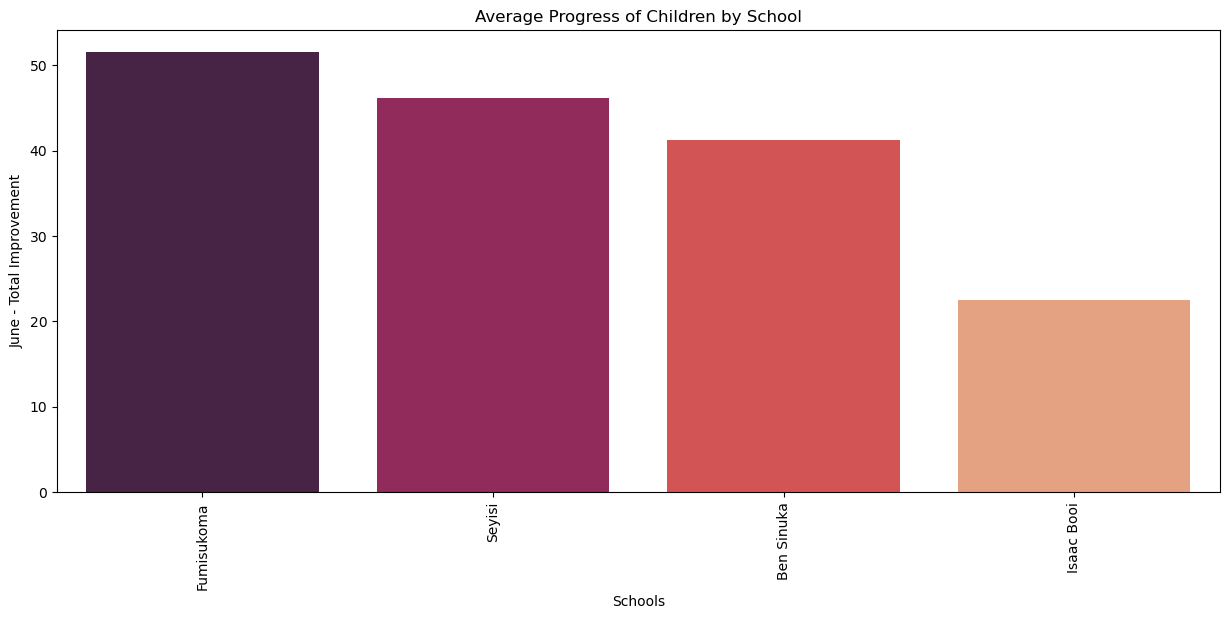

In [225]:
# First, calculate the order of schools based on the mean of 'June - Total Improvement'
order = Grade2_on.groupby('Schools')['June - Total Improvement'].mean().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(15, 6))

# Then, pass this order to the 'order' parameter in the barplot function
sns.barplot(data=Grade2_on, x='Schools', y='June - Total Improvement', order=order, errorbar=None, ax=ax, palette="rocket")
plt.title("Average Progress of Children by School")
plt.xticks(rotation=90)
plt.show()

In [226]:
df_Grade2_improvement = gbo2_on[improvement_columns].mean()
df_Grade2_improvement.sort_values('June - Total Improvement', ascending=False)

,June - Listen First Sound Improvement,June - Listen Word Improvement,June - Phonics Improvement,June - Blends Improvement,June - Sight Words Improvement,June - Read Sentences Improvement,June - Read Story Improvement,June - Written Letters Improvement,June - Write CVCs Improvement,June - Write Sentence Improvement,June - Total Improvement
Schools,,,,,,,,,,,
Fumisukoma,0.361111,0.944444,2.555556,1.388889,8.388889,3.222222,18.916667,1.694444,0.361111,13.361111,51.527778
Seyisi,0.921053,1.342105,7.763158,2.578947,5.605263,1.421053,16.315789,4.394737,1.000000,4.184211,46.210526
Ben Sinuka,0.857143,0.928571,3.142857,2.357143,5.714286,3.857143,9.571429,3.785714,1.714286,9.071429,41.285714
Isaac Booi,0.305556,2.166667,2.694444,1.416667,1.666667,1.333333,5.166667,1.944444,2.388889,3.333333,22.500000


# Grade 3 Summary

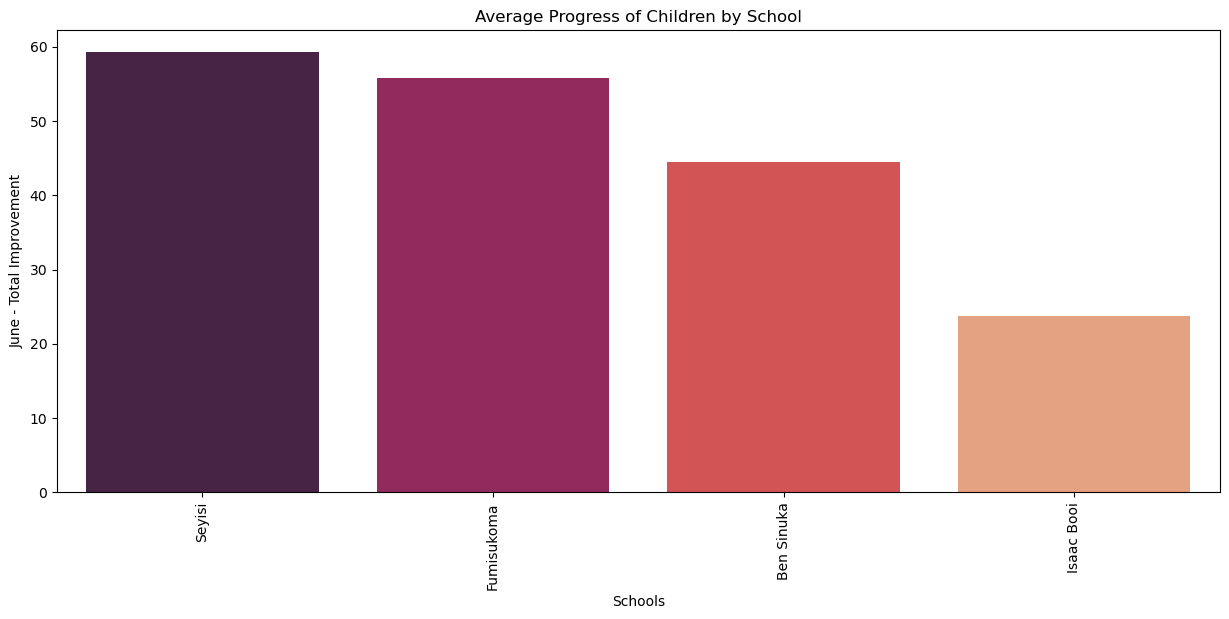

In [227]:
# First, calculate the order of schools based on the mean of 'June - Total Improvement'
order = Grade3_on.groupby('Schools')['June - Total Improvement'].mean().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(15, 6))

# Then, pass this order to the 'order' parameter in the barplot function
sns.barplot(data=Grade3_on, x='Schools', y='June - Total Improvement', order=order, errorbar=None, ax=ax, palette="rocket")
plt.title("Average Progress of Children by School")
plt.xticks(rotation=90)
plt.show()

In [228]:
df_Grade3_improvement = gbo3_on[improvement_columns].mean()
df_Grade3_improvement.sort_values('June - Total Improvement', ascending=False)

,June - Listen First Sound Improvement,June - Listen Word Improvement,June - Phonics Improvement,June - Blends Improvement,June - Sight Words Improvement,June - Read Sentences Improvement,June - Read Story Improvement,June - Written Letters Improvement,June - Write CVCs Improvement,June - Write Sentence Improvement,June - Total Improvement
Schools,,,,,,,,,,,
Seyisi,1.909091,4.000000,8.272727,3.090909,7.181818,1.818182,20.909091,2.909091,0.818182,7.454545,59.272727
Fumisukoma,1.027027,1.378378,2.108108,1.648649,4.918919,1.837838,26.513514,1.918919,0.189189,13.243243,55.810811
Ben Sinuka,0.411765,-0.705882,3.705882,1.470588,8.058824,5.294118,16.117647,1.941176,0.470588,7.176471,44.529412
Isaac Booi,0.272727,1.363636,2.636364,0.545455,4.000000,2.363636,5.045455,1.318182,0.272727,5.818182,23.681818


# LCs with the Most Overall Improvement

In [229]:
gbo_new = primary_on.groupby(['Schools', 'LC Name'])
gbo_new['June - Total Improvement'].mean().sort_values(ascending=False)

Schools       LC Name                     
Fumisukoma    Elam Xalipi                      65.181818
              Anelisa  Nakani                  59.083333
Ebongweni     Ncebakazi Sithako                55.416667
Fumisukoma    Nandipha  Putela                 54.083333
Ben Sinuka    Mihle Gunguluza                  52.583333
Seyisi        Nosipho Gxasheka                 52.454545
Ebongweni     Zintle Dyesi                     52.250000
Seyisi        Alizwa Tsili                     50.583333
Fumisukoma    Liyema Tom                       49.500000
Molefe        Babalwa Lindi                    48.800000
Fumisukoma    Silindokuhle Hlolimpi            48.583333
              Ntombizandile Ngamntwini         48.166667
              Esethu Mantakana                 47.900000
Charles Duna  Lutho Ngqokwe                    44.500000
              Sinazo Njokweni                  41.500000
Fumisukoma    Lisakhanya Mahleza               41.500000
Seyisi        Asenathi Phiri                 

# Beginners Performance
#### Checking the performance of children with a Sounds & Phonics Score under 20

In [230]:
df_beginners = primary[(primary['On The Programme'] == 'Yes') & (primary['Jan - Sounds and Phonics'] < 20)]
columns = ["June - Listen First Sound Improvement","June - Listen Word Improvement", "June - Phonics Improvement", "June - Sounds and Phonics Improvement"]
df_beginners.groupby('Schools')[columns].mean().sort_values("June - Sounds and Phonics Improvement", ascending=False)

,June - Listen First Sound Improvement,June - Listen Word Improvement,June - Phonics Improvement,June - Sounds and Phonics Improvement
Schools,,,,
Ebongweni,5.842105,5.526316,11.631579,23.000000
Seyisi,3.910714,4.178571,11.696429,19.785714
Molefe,4.730769,4.000000,8.538462,17.269231
Empumalanga,2.685714,1.400000,12.971429,17.057143
Fumisukoma,4.604167,2.458333,9.937500,17.000000
Ben Sinuka,4.411765,4.352941,5.941176,14.705882
Charles Duna,3.215385,0.753846,9.169231,13.138462
Astra,3.181818,1.318182,7.272727,11.772727
Aaron Gqadu,3.468750,1.031250,5.468750,9.968750


# Early Readers Performance
#### Checking the performance of children with a Reading Score above X

In [231]:
# Reading total is 128
# children["June - Reading"] = children["June - Blends"] + children["June - Sight Words"] + children['June - Read Sentences'] + children["June - Read Story"] + children["June - Story Comprehension"]

df_early_readers = primary[(primary['On The Programme'] == 'Yes') & (primary['Jan - Sounds and Phonics'] > 35) & primary['Jan - Reading'] < 30]
columns = ["June - Blends Improvement", "June - Sight Words Improvement", 'June - Read Sentences Improvement', "June - Read Story Improvement", "June - Reading Improvement"]
df_early_readers.groupby('Schools')[columns].mean().sort_values("June - Reading Improvement", ascending=False)

,June - Blends Improvement,June - Sight Words Improvement,June - Read Sentences Improvement,June - Read Story Improvement,June - Reading Improvement
Schools,,,,,
Fumisukoma,1.514085,4.514085,2.035211,12.781690,21.204225
Ben Sinuka,1.553191,4.744681,3.085106,8.702128,18.382979
Seyisi,1.728682,3.682171,0.844961,6.751938,13.232558
Astra,1.839286,2.625000,1.910714,3.250000,9.678571
Empumalanga,1.561404,1.614035,1.333333,3.087719,7.596491
Ebongweni,1.333333,2.500000,1.416667,1.520833,6.770833
Molefe,1.631579,1.973684,1.184211,0.157895,4.947368
Charles Duna,0.604167,1.458333,1.010417,1.739583,4.864583
Isaac Booi,0.577465,1.225352,0.746479,2.161972,4.732394


# Good Readers Performance

### Number of 'Good Readers'

In [232]:
df_good_readers = primary[(primary['On The Programme'] == 'Yes') & (primary['Jan - Sounds and Phonics'] > 35) & (primary['Jan - Reading'] > 50)]
df_good_readers.groupby('Schools')['Mcode'].count()

Schools
Astra          1
Ben Sinuka     5
Fumisukoma    27
Isaac Booi    11
Seyisi         2
Name: Mcode, dtype: int64

### Improvement of 'Good Readers'

In [233]:
# Reading total is 128
# children["June - Reading"] = children["June - Blends"] + children["June - Sight Words"] + children['June - Read Sentences'] + children["June - Read Story"] + children["June - Story Comprehension"]

df_good_readers = primary[(primary['On The Programme'] == 'Yes') & (primary['Jan - Sounds and Phonics'] > 35) & (primary['Jan - Reading'] > 50)]
columns = ["June - Sight Words Improvement","June - Read Story Improvement", "June - Reading Improvement"]
df_good_readers.groupby('Schools')[columns].mean().sort_values("June - Reading Improvement", ascending=False)

,June - Sight Words Improvement,June - Read Story Improvement,June - Reading Improvement
Schools,,,
Astra,4.000000,40.000000,45.000000
Ben Sinuka,11.000000,20.000000,37.800000
Seyisi,7.500000,19.500000,29.500000
Fumisukoma,3.481481,22.000000,27.407407
Isaac Booi,0.454545,-0.727273,3.181818


# Beginner Writers Performance

In [234]:
# Reading total is 128
# children["June - Reading"] = children["June - Blends"] + children["June - Sight Words"] + children['June - Read Sentences'] + children["June - Read Story"] + children["June - Story Comprehension"]

df_good_writers = primary[(primary['On The Programme'] == 'Yes') & (primary['Jan - Sounds and Phonics'] > 35) & (primary['Jan - Writing'] > 30)]
df_good_writers.groupby('Schools')['Mcode'].count()

Schools
Astra           13
Ben Sinuka      22
Charles Duna     4
Ebongweni        1
Empumalanga      1
Fumisukoma      60
Isaac Booi      38
Seyisi          15
Name: Mcode, dtype: int64

In [235]:
# Reading total is 128
# children["June - Reading"] = children["June - Blends"] + children["June - Sight Words"] + children['June - Read Sentences'] + children["June - Read Story"] + children["June - Story Comprehension"]

df_good_writers = primary[(primary['On The Programme'] == 'Yes') & (primary['Jan - Sounds and Phonics'] > 35) & (primary['Jan - Writing'] > 30)]
columns = ["June - Write Sentence Improvement","June - Write CVCs", "June - Writing Improvement"]
df_good_writers.groupby('Schools')[columns].mean().sort_values("June - Writing Improvement", ascending=False)

,June - Write Sentence Improvement,June - Write CVCs,June - Writing Improvement
Schools,,,
Ebongweni,23.000000,15.000000,31.000000
Charles Duna,21.250000,12.750000,26.750000
Astra,15.153846,11.692308,17.538462
Fumisukoma,14.050000,12.716667,16.050000
Ben Sinuka,9.863636,13.000000,11.954545
Seyisi,10.333333,12.133333,11.466667
Isaac Booi,5.105263,12.710526,6.763158
Empumalanga,-19.000000,12.000000,-14.000000


# Kids to Graduate
#### Kids scoring 85% or higher

In [236]:
graduates = children[children['June - Total'] > 224]
graduates.groupby(['Schools', 'Grade'])['Mcode'].count()

Schools       Grade  
Astra         Grade 1     1
Ben Sinuka    Grade 2     1
              Grade 3     4
Charles Duna  Grade 1     1
Fumisukoma    Grade 1     1
              Grade 2     3
              Grade 3    18
Isaac Booi    Grade 2     1
              Grade 3     4
Seyisi        Grade 2     7
              Grade 3     4
Name: Mcode, dtype: int64

## Isaac Booi LC Performance Checks

In [237]:
df_ib = children[(children['Schools'] == 'Isaac Booi') & (children['On The Programme'] == 'Yes')]
df_ib.groupby('LC Name')[improvement_columns].mean().sort_values('June - Total Improvement', ascending=False)

,June - Listen First Sound Improvement,June - Listen Word Improvement,June - Phonics Improvement,June - Blends Improvement,June - Sight Words Improvement,June - Read Sentences Improvement,June - Read Story Improvement,June - Written Letters Improvement,June - Write CVCs Improvement,June - Write Sentence Improvement,June - Total Improvement
LC Name,,,,,,,,,,,
Sisipho Wali,2.583333,2.916667,3.833333,1.500000,0.583333,1.166667,6.750000,4.583333,1.500000,1.583333,27.416667
Siya Matola,1.916667,2.166667,2.000000,0.083333,3.250000,0.000000,6.666667,3.750000,1.166667,2.833333,24.333333
Nominentle Magwa,1.333333,2.333333,2.416667,1.000000,0.583333,2.250000,-1.500000,4.500000,3.250000,6.500000,23.000000
Lizalise Baliwe,2.454545,1.090909,3.727273,0.363636,3.454545,0.818182,5.454545,3.000000,1.090909,1.090909,22.727273
Anam Mabangula,0.833333,1.416667,4.916667,0.666667,0.666667,1.833333,1.750000,2.166667,1.500000,3.083333,19.083333
Anita Ngceza,1.666667,2.083333,3.583333,-0.083333,0.166667,0.333333,-0.666667,5.833333,0.833333,3.833333,18.250000
Sinombulelo,1.750000,1.250000,4.500000,0.500000,1.666667,0.583333,2.083333,2.750000,1.000000,1.166667,17.666667
Seluleko Mvabi,-0.363636,2.363636,0.181818,1.363636,2.363636,1.090909,4.363636,1.000000,1.818182,3.272727,17.454545
Siyamthanda Shevan Palamente,0.166667,2.833333,3.833333,0.750000,1.083333,0.833333,2.000000,2.000000,2.166667,0.000000,16.416667


# Export CSVs with Children's Results

In [238]:
import os

# Create a new directory for these CSVs, if it doesn't already exist
os.makedirs('June Results', exist_ok=True)

# List of columns to keep in each CSV
columns_to_keep = ['LC Name', 'Full Name', 'June - Listen First Sound', 'June - Listen Word', 'June - Phonics', 'June - Blends', 
                   'June - Sight Words', 'June - Read Sentences', 'June - Read Story', 
                   'June - Story Comprehension', 'June - Written Letters', 'June - Write Name', 
                   'June - Write CVCs', 'June - Write Sentences', 'June - Total']

# Group by 'LC Name' and iterate over the groups
for lc_name, group in children.groupby('LC Name'):
    # Filter down to the columns we're interested in
    filtered_group = group[columns_to_keep].sort_values('June - Total', ascending=False)
    
    # Construct the CSV filename
    filename = os.path.join('June Results', f'{lc_name}.csv')
    
    # Export to CSV
    filtered_group.to_csv(filename, index=False)


In [239]:
import os

# Create a new directory for these CSVs, if it doesn't already exist
os.makedirs('June Results', exist_ok=True)

# Lists of columns to keep in each CSV
columns_to_keep1 = ['LC Name', 'Full Name', 'Total Sessions', 'June - Listen First Sound', 'June - Listen Word', 'June - Phonics', 'June - Blends', 
                    'June - Sight Words', 'June - Read Sentences', 'June - Read Story', 
                    'June - Written Letters',
                    'June - Write CVCs', 'June - Write Sentences', 'June - Total']

# Replace these with your second list of columns
columns_to_keep2 = ["LC Name", "Full Name", "Total Sessions","June - Listen First Sound Improvement","June - Listen Word Improvement", "June - Phonics Improvement","June - Blends Improvement","June - Sight Words Improvement", "June - Read Sentences Improvement", "June - Read Story Improvement", "June - Written Letters Improvement", "June - Write CVCs Improvement", "June - Write Sentence Improvement", "June - Total Improvement" ]

# Group by 'LC Name' and iterate over the groups
for lc_name, group in children.groupby('LC Name'):
    # Filter down to the columns we're interested in
    filtered_group1 = group[columns_to_keep1].sort_values('Full Name')
    filtered_group2 = group[columns_to_keep2].sort_values('Full Name')
    
    # Construct the CSV filename
    filename = os.path.join('June Results', f'{lc_name}.csv')
    
    # Export first filtered group to CSV
    filtered_group1.to_csv(filename, index=False)
    
    # Append second filtered group to same CSV, with a couple of blank lines between
    with open(filename, 'a') as f:
        # Write blank lines
        f.write('\n\n')
        # Write second filtered group to CSV
        filtered_group2.to_csv(f, index=False)
